In [219]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [220]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [221]:
df = pd.read_csv("CC GENERAL.csv")
df.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [222]:
df.shape

(8950, 18)

In [223]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [225]:
df.isnull().sum() #information about null values

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

We see there are one NULL value in CREDIT_LIMIT table and 313 NULL values in MINIMUM_PAYMENTS. So, having these empty and replacing with mean value makes more sense than replacing with 0. So, we do that in below code:

In [226]:
df.mean() #for numeric values

C:\Users\chunc\AppData\Local\Temp\ipykernel_3136\4123775769.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean() #for numeric values


BALANCE                             1564.474828
BALANCE_FREQUENCY                      0.877271
PURCHASES                           1003.204834
ONEOFF_PURCHASES                     592.437371
INSTALLMENTS_PURCHASES               411.067645
CASH_ADVANCE                         978.871112
PURCHASES_FREQUENCY                    0.490351
ONEOFF_PURCHASES_FREQUENCY             0.202458
PURCHASES_INSTALLMENTS_FREQUENCY       0.364437
CASH_ADVANCE_FREQUENCY                 0.135144
CASH_ADVANCE_TRX                       3.248827
PURCHASES_TRX                         14.709832
CREDIT_LIMIT                        4494.449450
PAYMENTS                            1733.143852
MINIMUM_PAYMENTS                     864.206542
PRC_FULL_PAYMENT                       0.153715
TENURE                                11.517318
dtype: float64

In [227]:
 #fill null values with corresponding mean values
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean(), inplace=True)
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean(), inplace=True)
df.isnull().sum() #recheck if NULL values still exists

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [228]:
df.drop('CUST_ID', axis=1, inplace=True) #As it is object type , we drop customer ID
df.head(1)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.4,0.0,95.4,0.0,0.166667,0.0,0.083333,0.0,0,2,1000.0,201.802084,139.509787,0.0,12


EDA OF NUMERIC DATA
Here EDA is done only for numeric data as categorical is only customer ID which is unique hence EDA on this column does not give much insight

FIVE POINT SUMMARY

In [229]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Pearson's correlation

In [230]:
df.corr() #default gives pearson's correlation matrix

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531267,0.322802,0.394282,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095795,0.065008,0.114249,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356959,0.603264,0.093515,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319721,0.567292,0.048597,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256496,0.384084,0.131687,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303983,0.453238,0.139223,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119778,0.103464,0.002976,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295030,0.243537,-0.029963,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060752,0.085551,0.029590,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132616,0.183192,0.097898,-0.249773,-0.133372


Check number of unique values for boxplot and histogram to get least numbers as grouping variable:

In [231]:
for col in df.columns:
  print(col, df[col].nunique())

BALANCE 8871
BALANCE_FREQUENCY 43
PURCHASES 6203
ONEOFF_PURCHASES 4014
INSTALLMENTS_PURCHASES 4452
CASH_ADVANCE 4323
PURCHASES_FREQUENCY 47
ONEOFF_PURCHASES_FREQUENCY 47
PURCHASES_INSTALLMENTS_FREQUENCY 47
CASH_ADVANCE_FREQUENCY 54
CASH_ADVANCE_TRX 65
PURCHASES_TRX 173
CREDIT_LIMIT 206
PAYMENTS 8711
MINIMUM_PAYMENTS 8637
PRC_FULL_PAYMENT 47
TENURE 7


Here least value is for tenure, hence i use that for boxplot and histogram

BOX PLOT

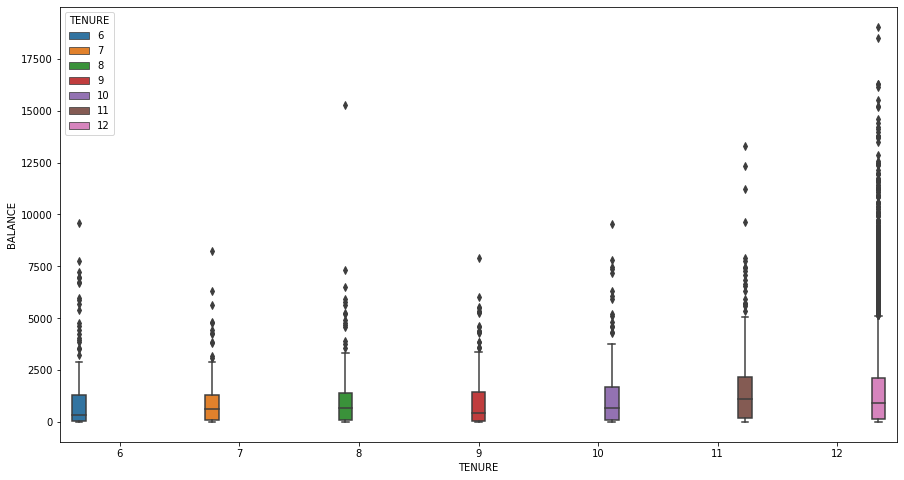

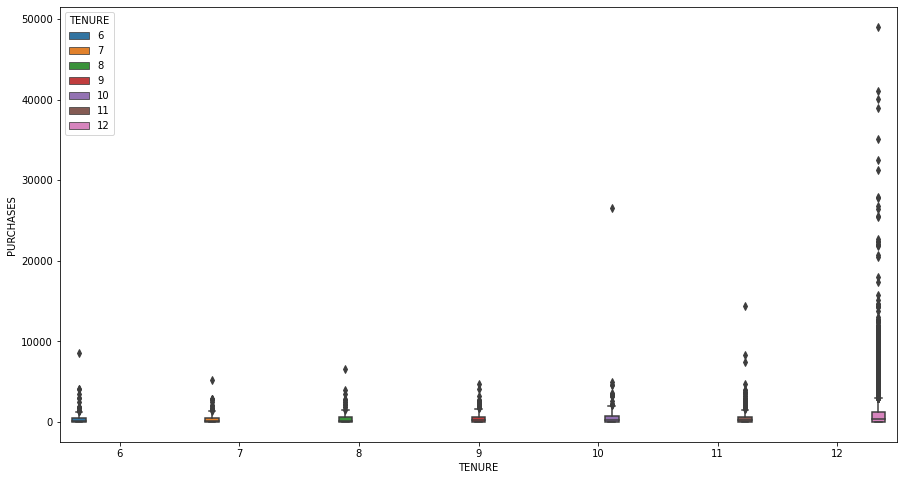

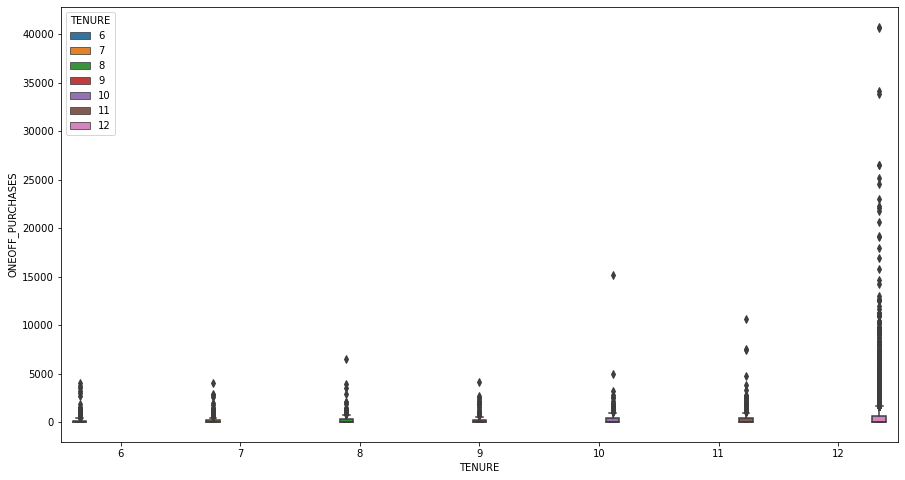

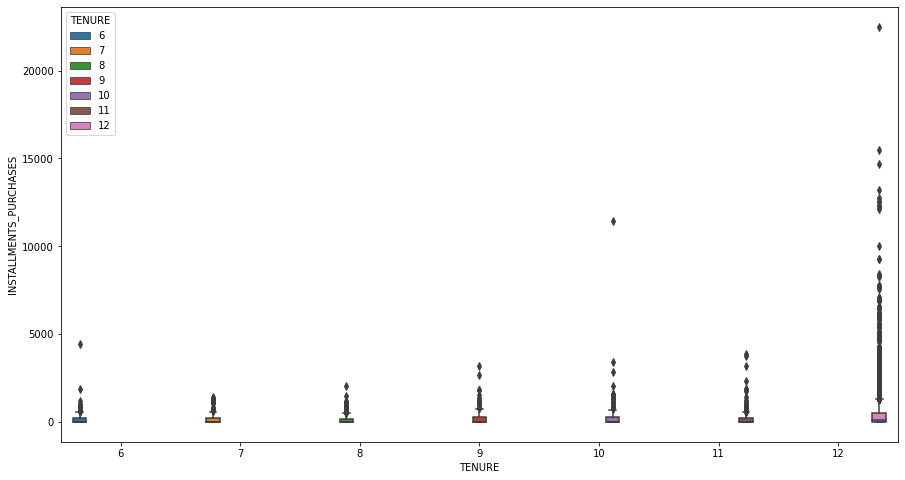

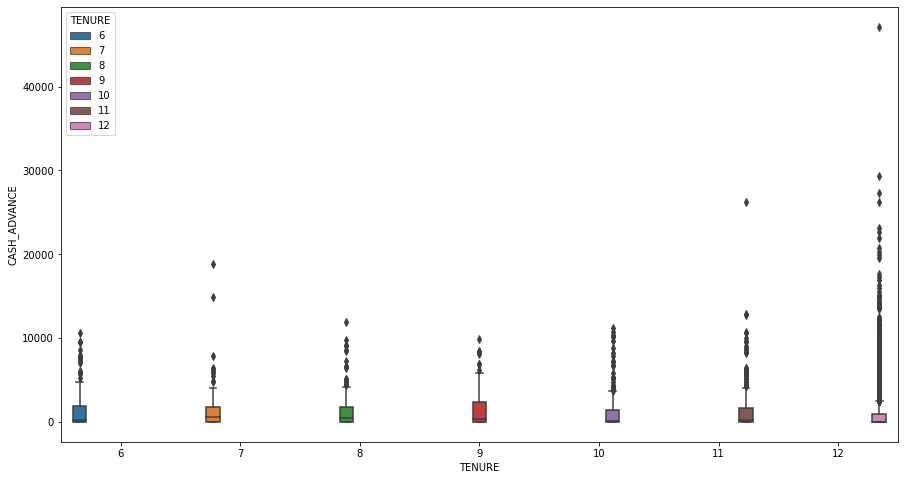

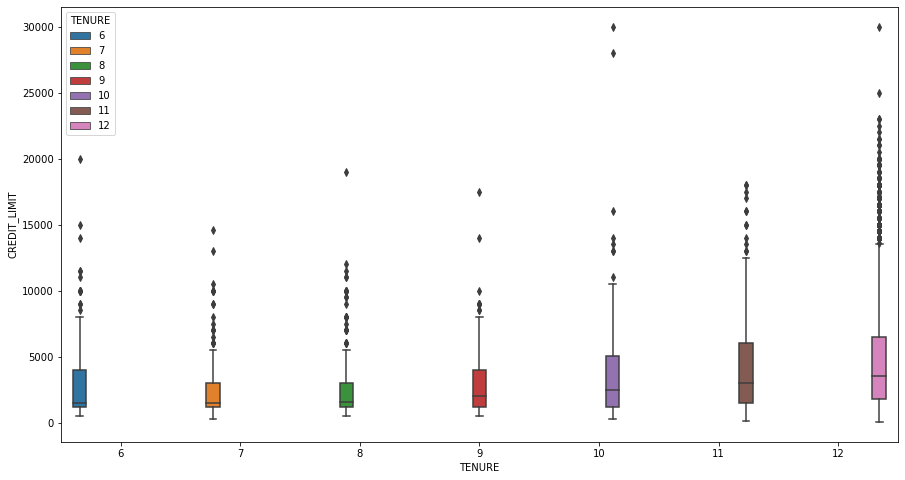

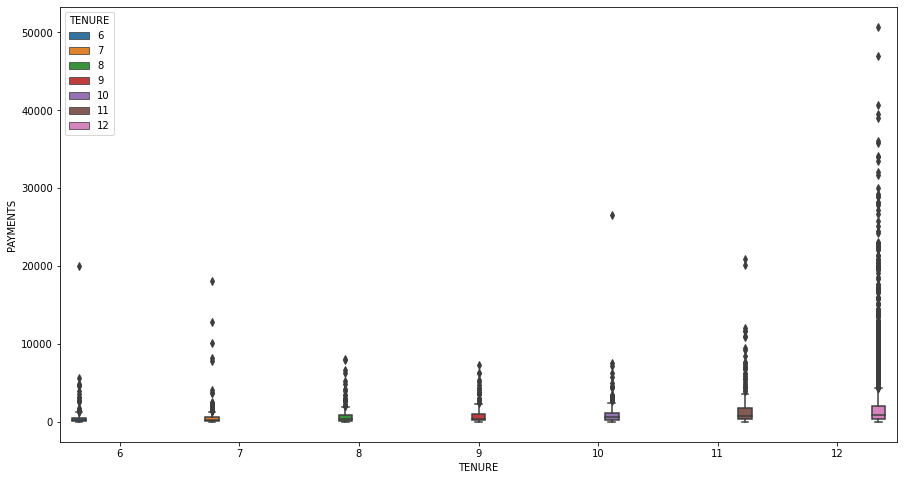

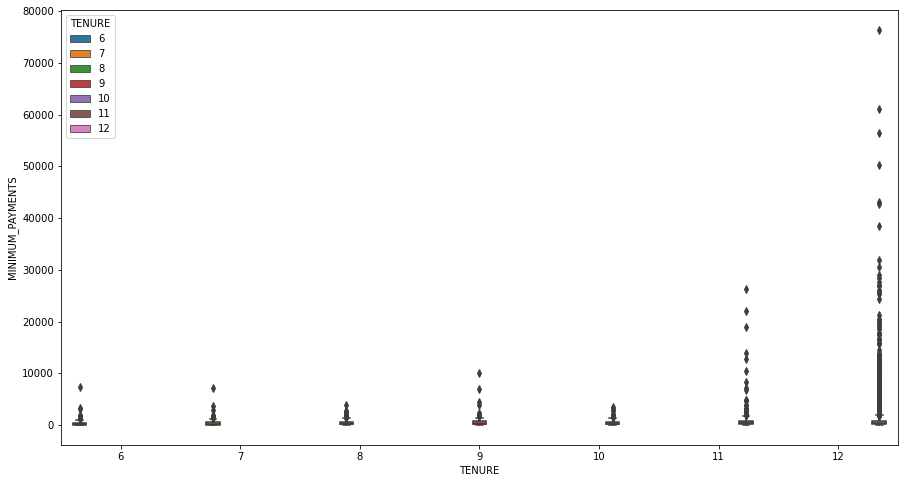

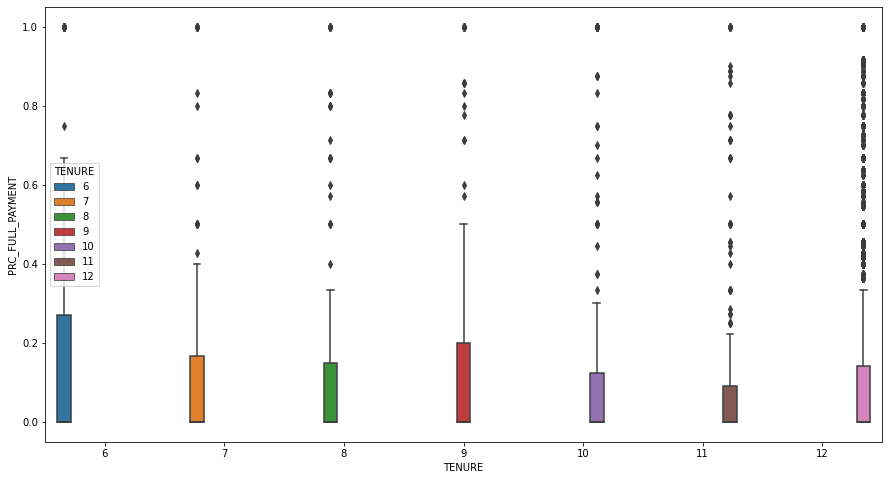

In [249]:
#separating values as df1 to be plotted as boxplot wrt tenure
df1 = df[['BALANCE','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']]

for col in df1.columns:
  plt.figure(figsize=(15,8))
  plt.ax = sns.boxplot(x="TENURE", y=col, hue="TENURE", data = df)

HISTOGRAM

Plotting histogram for various values like tenure, number of transactions of purchases, advance payments in cash and frequency of balance purchases, purchase made, oneoff purchases made, purchase paid in installments, cash paid in advance.

1.000000    6211
0.909091     410
0.818182     278
0.727273     223
0.545455     219
0.636364     209
0.454545     172
0.363636     170
0.272727     151
0.181818     146
0.000000      80
0.090909      67
0.833333      60
0.875000      57
0.900000      55
0.888889      53
0.857143      51
0.500000      40
0.666667      37
0.333333      22
0.777778      22
0.800000      20
0.571429      19
0.750000      17
0.714286      15
0.700000      13
0.625000      11
0.555556      10
0.400000      10
0.375000       9
0.125000       9
0.200000       9
0.300000       9
0.250000       8
0.100000       8
0.285714       8
0.142857       7
0.444444       7
0.166667       7
0.600000       6
0.222222       5
0.428571       5
0.111111       5
Name: BALANCE_FREQUENCY, dtype: int64
1.000000    2178
0.000000    2043
0.083333     677
0.916667     396
0.500000     395
0.166667     392
0.833333     373
0.333333     367
0.250000     345
0.583333     316
0.666667     310
0.750000     299
0.416667     289
0.090909  

<Figure size 1440x720 with 0 Axes>

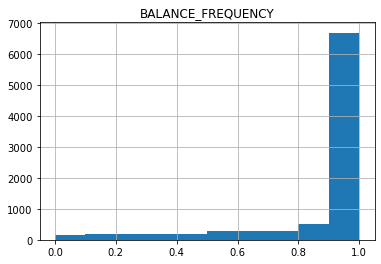

<Figure size 1440x720 with 0 Axes>

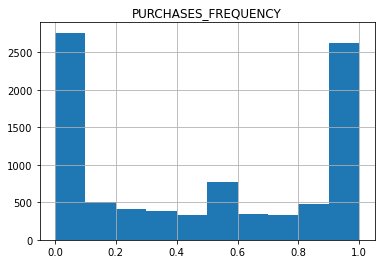

<Figure size 1440x720 with 0 Axes>

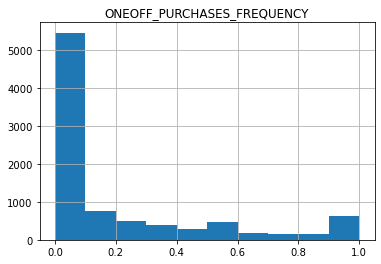

<Figure size 1440x720 with 0 Axes>

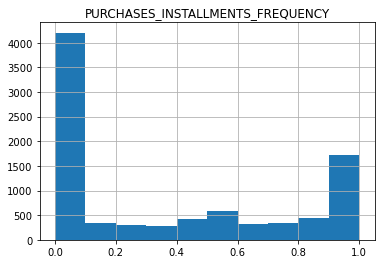

<Figure size 1440x720 with 0 Axes>

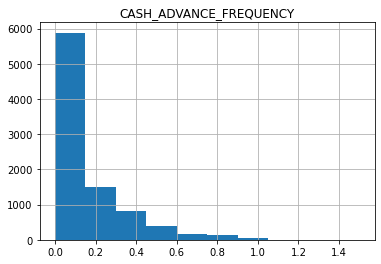

<Figure size 1440x720 with 0 Axes>

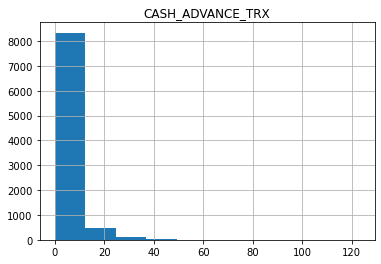

<Figure size 1440x720 with 0 Axes>

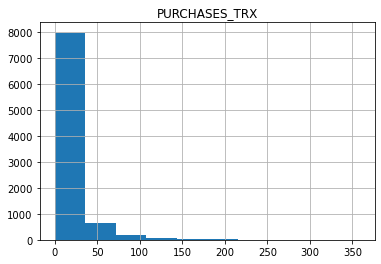

<Figure size 1440x720 with 0 Axes>

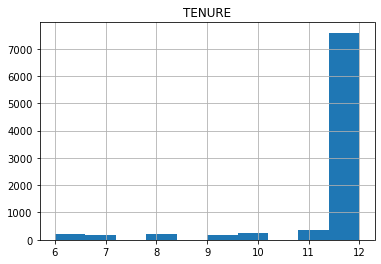

In [233]:
#separating df value as new data frame df2 to plot histogram
df2 = df[['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX','TENURE']]
for col in df2.columns:
  plt.figure(figsize=(20,10))
  df2.hist(col)
  print (df2[col].value_counts())

CLUSTERING - K-MEANS
NORMALIZATION

Normalization is required to be done for dimension reduction to happen as Principle component analysis uses scaled data to reduce dimension as large values will else dominate the results of PCA. StandardScaler in scikit-learn is used to standardize the dataset’s features onto the unit scale (mean = 0 and variance = 1)

In [234]:
temp = df
scale = StandardScaler() 
scaled = scale.fit_transform(df)
# Normalizing the scaled data
normalized = normalize(scaled) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized, columns = temp.columns)
normalized_df.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.311938,-0.106297,-0.181072,-0.152108,-0.148760,-0.198921,-0.343687,-0.289212,-0.301422,-0.287801,-0.202878,-0.217905,-0.409290,-0.225425,-1.325192e-01,-0.223964,0.153704
1,0.219925,0.037539,-0.131222,-0.099749,-0.127037,0.728166,-0.341434,-0.189660,-0.256265,0.160401,0.030761,-0.165384,0.192448,0.228779,2.495877e-02,0.065457,0.100796
2,0.126682,0.146783,-0.030504,0.030850,-0.128790,-0.132249,0.359771,0.757440,-0.259802,-0.191339,-0.134880,-0.030888,0.234039,-0.108739,-2.880315e-02,-0.148899,0.102187
3,0.020589,-0.426439,0.097309,0.229034,-0.190618,-0.154587,-0.425253,-0.167447,-0.384524,-0.108570,-0.138184,-0.231288,0.346393,-0.251048,2.045620e-17,-0.220379,0.151244
4,-0.151595,0.218909,-0.195238,-0.146744,-0.192075,-0.197234,-0.428504,-0.168727,-0.387463,-0.285359,-0.201157,-0.233056,-0.382591,-0.153959,-1.123064e-01,-0.222064,0.152400
5,0.053746,0.236216,0.070439,-0.162741,0.464979,-0.212827,0.200300,-0.309430,0.251125,-0.307920,-0.217060,-0.123079,-0.337651,-0.052460,3.018874e-01,-0.239621,0.164449
6,-0.061079,0.070277,0.386516,0.474842,0.041598,-0.063318,0.172252,0.362648,0.216928,-0.091610,-0.064578,0.268991,0.335747,0.216537,-3.877375e-02,0.392491,0.048925
7,0.047238,0.196541,-0.100678,-0.135407,0.010543,-0.177081,0.481730,-0.257458,0.606676,-0.256202,-0.180603,-0.041358,-0.228806,-0.138132,-5.407251e-02,-0.199374,0.136828
8,-0.154660,0.303481,-0.038854,0.024370,-0.136724,-0.273431,-0.229170,-0.233911,-0.168672,-0.395603,-0.278870,-0.228827,0.403388,-0.211425,-1.388098e-01,-0.307855,0.211277
9,-0.223745,-0.461903,0.042969,0.136921,-0.149902,-0.153929,-0.265951,-0.039563,-0.302391,-0.222705,-0.156990,-0.155352,0.589623,-0.064744,-1.080935e-01,-0.173307,0.118939


DIMENSION REDUCTION

Dimension reduction is done to get 17 columns/attributes to only two attributes for ease of visulisation of 2D as I can not visualise 17D for 17 attributes. hence, method used here for dimension reduction is principal component method

In [235]:
princi = PCA(n_components = 2)
princi_temp = princi.fit_transform(normalized_df) 
princi_temp = pd.DataFrame(princi_temp) #transforming it to pandas data frame data type
princi_temp.columns = ['P1', 'P2'] 
princi_temp.head()

,P1,P2
0,-0.489826,-0.679678
1,-0.518791,0.545010
2,0.330885,0.268978
3,-0.482374,-0.092109
4,-0.563289,-0.481915


In [236]:
#explaining the explained variances in PCA1 and PCA2
explained_variance = princi.explained_variance_ratio_
explained_variance

array([0.29040871, 0.18391053])

This array is vector of variances of PCA1 and PCA2 which is explained by them respectively.This shows that first PCA explains 29% variance while second explains 18% variance which together explains (29+18)% = 47% of variances in the data.

ELBOW METHOD

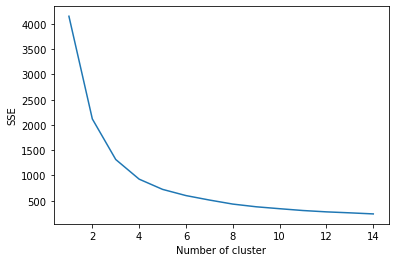

In [237]:
sse = {}
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(princi_temp)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

It is a bit difficult to understand here from elbow method as it can be 2 or 3 as both show a sharp elbow. So, trying to take both and checking.

Now that we know optimum number of clusters, we model the data and cluster the same. We repeat this twice for cluster size 2 and 3

DATA MODELLING

In [238]:
kmean3 = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0) #3 cluster
kmean3.fit_predict(normalized_df)
df['cluster'] = kmean3
labels3=kmean3.labels_
clusters3=pd.concat([temp, pd.DataFrame({'cluster3':labels3})], axis=1)
clusters3.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster,cluster3
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,"KMeans(n_clusters=3, random_state=0)",2
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,"KMeans(n_clusters=3, random_state=0)",1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,"KMeans(n_clusters=3, random_state=0)",0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,"KMeans(n_clusters=3, random_state=0)",2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,"KMeans(n_clusters=3, random_state=0)",2


INTERPRETING CLUSTERS

In [239]:
clusters3['cluster3'].value_counts()

0    3746
2    3149
1    2055
Name: cluster3, dtype: int64

In [240]:
clusters3.groupby('cluster3').mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster3,,,,,,,,,,,,,,,,,
0,1175.280394,0.938218,1937.206471,1083.538345,854.074768,226.260707,0.891482,0.348023,0.717999,0.040888,0.797117,29.498131,4857.933863,1963.988189,812.465483,0.273232,11.624666
1,3551.381258,0.958821,423.670521,290.142010,133.588691,3321.134582,0.235141,0.118436,0.138627,0.407354,10.882725,5.725547,6089.085748,2731.749765,1563.216269,0.035109,11.308029
2,730.822759,0.751551,270.328644,205.505875,65.152931,345.631083,0.179718,0.084126,0.091207,0.069630,1.183550,2.980946,3021.413501,806.856765,469.591432,0.088940,11.526199


DOING SAME WITH CLUSTER SIZE OF 2

In [241]:
kmean2 = KMeans(n_clusters = 2, init = 'k-means++', random_state = 0) #2 cluster
kmean2.fit_predict(normalized_df)
labels2 = kmean2.labels_
clusters2=pd.concat([temp, pd.DataFrame({'cluster2':labels2})], axis=1)
clusters2.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster,cluster2
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,"KMeans(n_clusters=3, random_state=0)",0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,"KMeans(n_clusters=3, random_state=0)",0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,"KMeans(n_clusters=3, random_state=0)",1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,"KMeans(n_clusters=3, random_state=0)",0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,"KMeans(n_clusters=3, random_state=0)",0


In [242]:
clusters2['cluster2'].value_counts()

0    4659
1    4291
Name: cluster2, dtype: int64

In [243]:
clusters2.groupby('cluster2').mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster2,,,,,,,,,,,,,,,,,
0,1775.602872,0.833283,238.194140,191.222582,47.114518,1446.071631,0.145157,0.081301,0.062215,0.199912,4.799528,2.546255,4098.930885,1459.051487,879.263011,0.053989,11.432926
1,1335.240253,0.925031,1833.823528,1028.060699,806.233717,471.603060,0.865148,0.334005,0.692578,0.064822,1.565136,27.916570,4923.888041,2030.742624,847.858817,0.261993,11.608949


Here we see number of clusters as 2 is not that efficient to segment the customers as many parameters are nearly same in both cluster, hence we move on with number of clusters as 3!

CLUSTER VISUALISATION

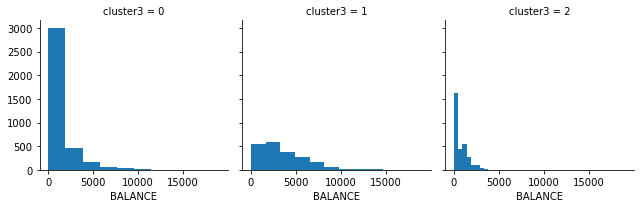

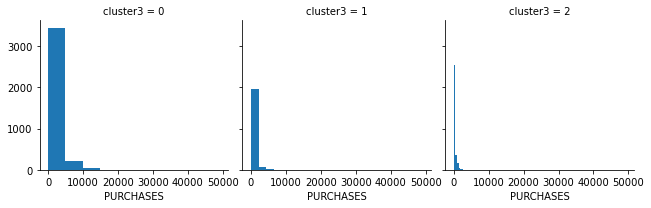

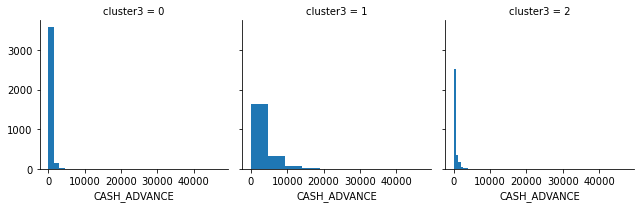

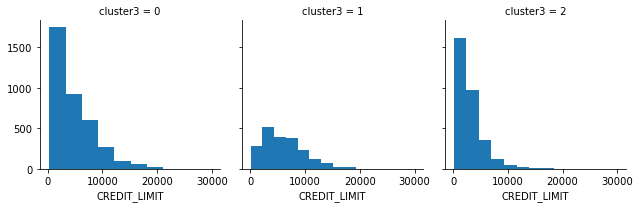

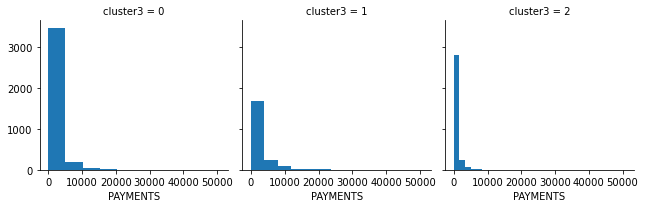

In [244]:
for c in ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS']:
    grid= sns.FacetGrid(clusters3, col='cluster3')
    grid.map(plt.hist, c)

In [245]:
visual3 = pd.concat([princi_temp, pd.DataFrame({'cluster3':labels3})], axis=1)  
visual3.head(5)

,P1,P2,cluster3
0,-0.489826,-0.679678,2
1,-0.518791,0.545010,1
2,0.330885,0.268978,0
3,-0.482374,-0.092109,2
4,-0.563289,-0.481915,2


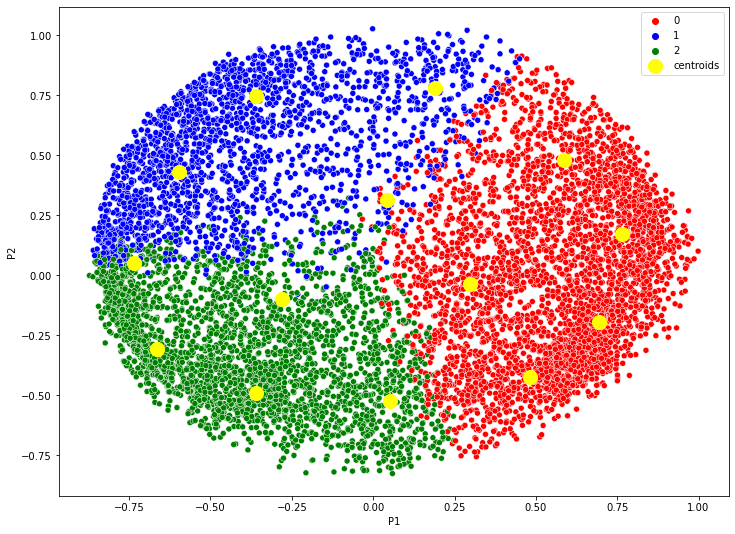

In [246]:
plt.figure(figsize=(12,9))
ax = sns.scatterplot(x="P1", y="P2", hue="cluster3", data=visual3, palette=['r','b','g'])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c = 'yellow', label = 'centroids')
plt.legend()
plt.show()

INTERPRETATION OF 3 CLUSTER:

CLUSTER 0 (number : 3150): these customers have low balances and purchases with medium cash paid as advance also low purchase transactions indicate that they do not purchase that often. hence, this segment of people should not be targeted as of now by the company as they are least spenders with lowest credit limit.

CLUSTER 1 (number : 3746): this group has max number of customers having medium balances but are high purchasers with okish credit limit (close to highest mean of cluster 2). Hence, all these customers should be the first target of the company with most probability that this segment will purchase their services.

CLUSTER 2 (number : 2054): small number of people who have high balances and cash advances, medium purchase frequency. They also have high credit limit. This can indicate that these customer might use theur credit cards as loans and company can target this segment accordingly.